# Exploratory Data Analysis on Iris Dataset
*By Bhavya Bhargava*<br>

The IRIS dataset is a classic dataset in machine learning and statistics, consisting of 150 samples of iris flowers from three species: Iris-setosa, Iris-versicolor, and Iris-virginica.  The dataset is widely used for classification, clustering, pattern recognition and EDA tasks due to its simplicity and well-defined structure.

### About the Dataset:
#### Dataset Source:  
The IRIS dataset was first introduced by British statistician Ronald A. Fisher in his 1936 paper on linear discriminant analysis. It is publicly available and can be accessed through libraries like `scikit-learn` or UCI Machine Learning Repository. For our use-case we'll be going with the `scikit-learn` pathway.

#### Features:  
1. **Sepal Length (cm)**: Length of the sepal in centimeters.  
2. **Sepal Width (cm)**: Width of the sepal in centimeters.  
3. **Petal Length (cm)**: Length of the petal in centimeters.  
4. **Petal Width (cm)**: Width of the petal in centimeters.  
5. **Species**: Target variable indicating the iris flower species (Iris-setosa, Iris-versicolor, Iris-virginica).  

![Iris Flower Features](iris_petal_sepal.png)


In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing the Iris data from Scikit-Learn
from sklearn.datasets import load_iris

# For getting the plots inline
%matplotlib inline

Exploring the structre of Iris data from the Scikit-learn package and converting it to a dataframe for further processing.

In [7]:
# checking the structure of the data from load_iris() function
iris = load_iris()

iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

As we now have the structre of the dictonary carrying the data it's time to check the type of data for some of the relevant keys like target_names, feature_names, and target.

In [8]:
# Checking the target_names
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [14]:
# Checking the feature_names
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
# Checking the values for the target
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Based on the above observations, we can now create a data frame with names of the species mapped to them making our future analysis easier.

In [29]:
# Converting the dataset into a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adding the target column (numerical labels)
iris_df['iris_type'] = iris.target

# Mapping the target names to their corresponding class names
iris_df['iris_species'] = iris_df['iris_type'].map({i: name for i, name in enumerate(iris.target_names)})

# Once mapped getting rid of the redundant 'iris_type' column
iris_df = iris_df.drop(columns=['iris_type'])

# Displaying the first few rows of the DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Confirming the structure(shape) of the dataset to make sure right future processing takes place.

In [37]:
# Checking the shape of data
iris_df.shape

(150, 5)

### Data Quality Assessment

Let's proceed with checking the type of data and presence of any NULL values in our data frame for better analysis strategy.

In [19]:
# Checking the type of data and NULL values in the dataframe
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   iris_name          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Observations from the above data:
1. There are 4 numberical columns with float values and there is only a single column with cartegorical data.
2. No columns seem to have any NULL values.

Now, let's check if there are any duplicates in the data and whether they affect the balance of data:

In [20]:
# Checking for any duplicate values in the dataset
iris_df[iris_df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_name
142,5.8,2.7,5.1,1.9,virginica


As there is a duplicate record we need to check if it affects the balance of the dataset which might further affect our capability of getting meaningful insights from it.

In [30]:
# Checking the balance of the dataset
iris_df['iris_species'].value_counts()

iris_species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

As it can be observed, the balance of the dataset is maintained despite having the duplicate value, there is no need to remove it from the dataset.

### Data Visulaization

To visulaize and assess the data, we can start by checking out the spread of data from average values of various features of the iris-species to their maximum and least values.

In [34]:
# Grouping and checking the spread of features for various Iris-Species
iris_df.groupby(['iris_species']).describe().transpose()

iris_species                setosa  versicolor  virginica
sepal length (cm) count  50.000000   50.000000  50.000000
                  mean    5.006000    5.936000   6.588000
                  std     0.352490    0.516171   0.635880
                  min     4.300000    4.900000   4.900000
                  25%     4.800000    5.600000   6.225000
                  50%     5.000000    5.900000   6.500000
                  75%     5.200000    6.300000   6.900000
                  max     5.800000    7.000000   7.900000
sepal width (cm)  count  50.000000   50.000000  50.000000
                  mean    3.428000    2.770000   2.974000
                  std     0.379064    0.313798   0.322497
                  min     2.300000    2.000000   2.200000
                  25%     3.200000    2.525000   2.800000
                  50%     3.400000    2.800000   3.000000
                  75%     3.675000    3.000000   3.175000
                  max     4.400000    3.400000   3.800000
petal length (cm) count  50.000000   50.000000  50.000000
                  mean    1.462000    4.260000   5.552000
                  std     0.173664    0.469911   0.551895
                  min     1.000000    3.000000   4.500000
                  25%     1.400000    4.000000   5.100000
                  50%     1.500000    4.350000   5.550000
                  75%     1.575000    4.600000   5.875000
                  max     1.900000    5.100000   6.900000
petal width (cm)  count  50.000000   50.000000  50.000000
                  mean    0.246000    1.326000   2.026000
                  std     0.105386    0.197753   0.274650
                  min     0.100000    1.000000   1.400000
                  25%     0.200000    1.200000   1.800000
                  50%     0.200000    1.300000   2.000000
                  75%     0.300000    1.500000   2.300000
                  max     0.600000    1.800000   2.500000

A few things to note here include:
1. The dimensions of the features for the Setosa species of the Iris plant are very different from Versicolor and Virginica species which present some similarities.
2. For the Setosa species the sepal width is more than the other species while have all the other dimensions less than the others. This doesn't include the sepal length whose average length is almost the same for all.
3. There is also a lot of variation in the maximum length of dimensions for the species where Virginica leads the pack expect in the sepal width. This shows that other than their average length they have varying potential of growth.

To confirm these and to get more clarity on the same we can take the help of some descriptive analysis using graphs.

### Bivariate Analysis:

Bivariate analysis is the statistical examination of the relationship between two variables. It helps determine if there is an association, correlation, or dependency between the variables.
In our case it might be a great starting point, for helping us verify the relation between the features in our dataset which we had observed earlier when descibing them.

#### Scatter Plots:

Using scatter plots we can effectively visulaize the relation between the features. These can be utilized to validate separability and relationships between features while complementing other visualizations.

Checking the relationship between the Sepal length and width for the various species.

<Axes: title={'left': 'Iris species based comparision between Sepal Length and Width'}, xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

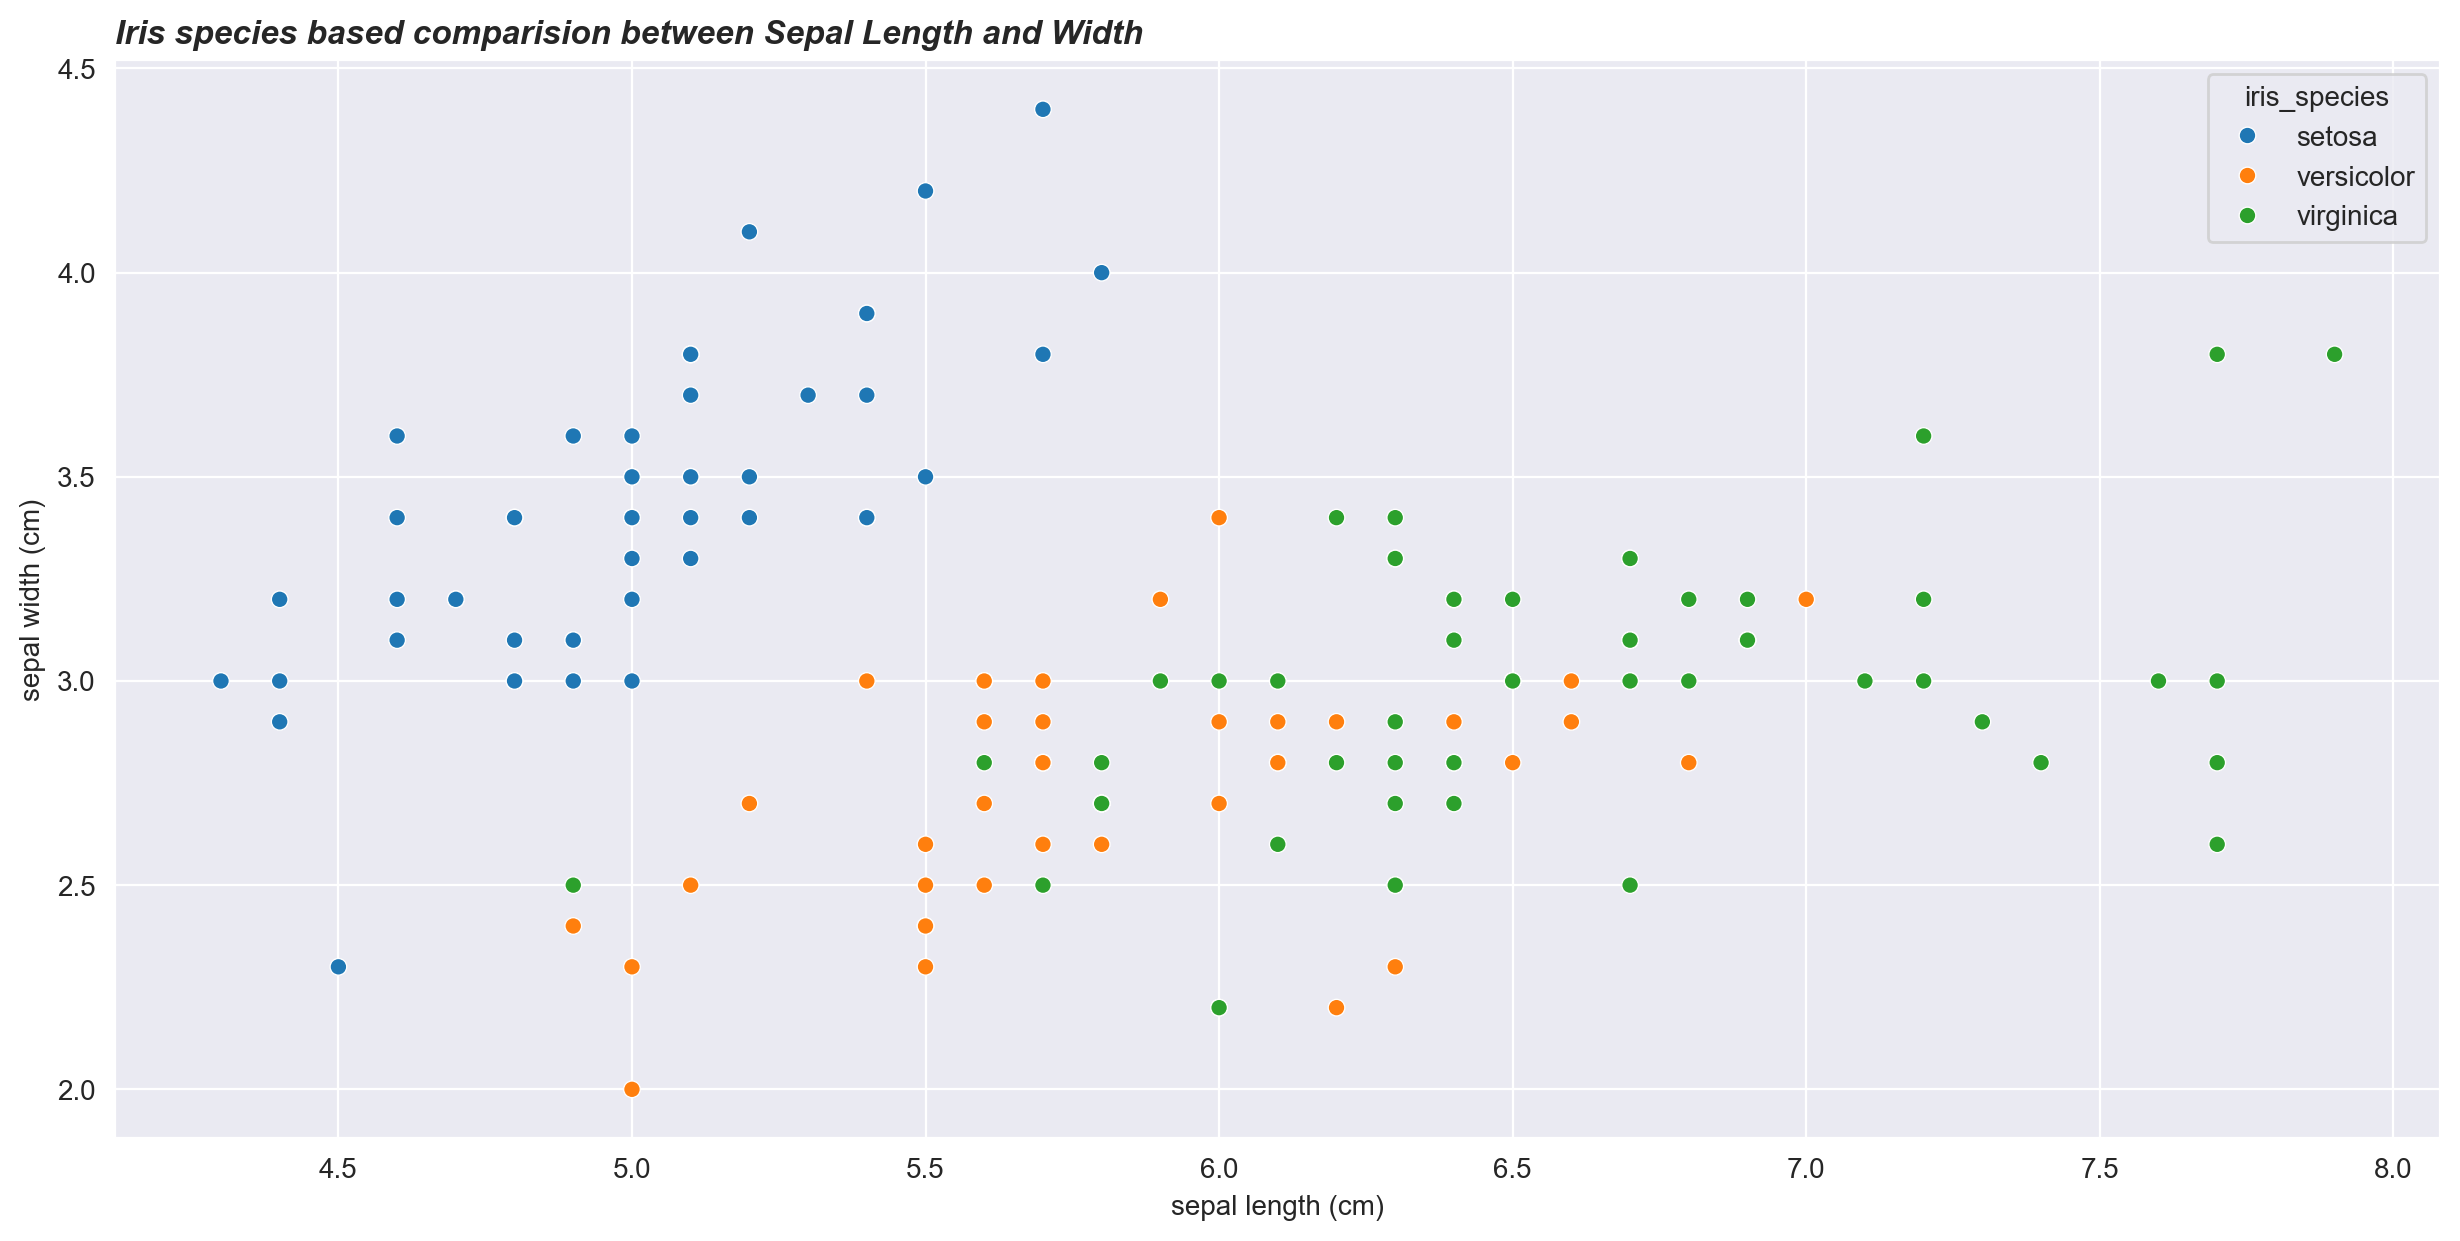

In [44]:
# Creating scatter plot for species between Sepal length and width
plt.figure(figsize=(15,7),dpi=200)
sns.set_style('darkgrid')
plt.title('Iris species based comparision between Sepal Length and Width', 
          loc='left', weight = 'bold', style = 'italic')
sns.scatterplot(x = iris_df['sepal length (cm)'], y = iris_df['sepal width (cm)'], hue = iris_df['iris_species'])

#### Observations from above:
1. The sepals of Setosa species seem to have a broader width and shorter length as compared to other species.
2. For Versicolor and Virginica species the length seems to be higher with shorter widths.

Now, let's move on to checking the relationship between the Petal length and width of the different species.

<Axes: title={'left': 'Iris species based comparision between Petal Length and Width'}, xlabel='petal length (cm)', ylabel='petal width (cm)'>

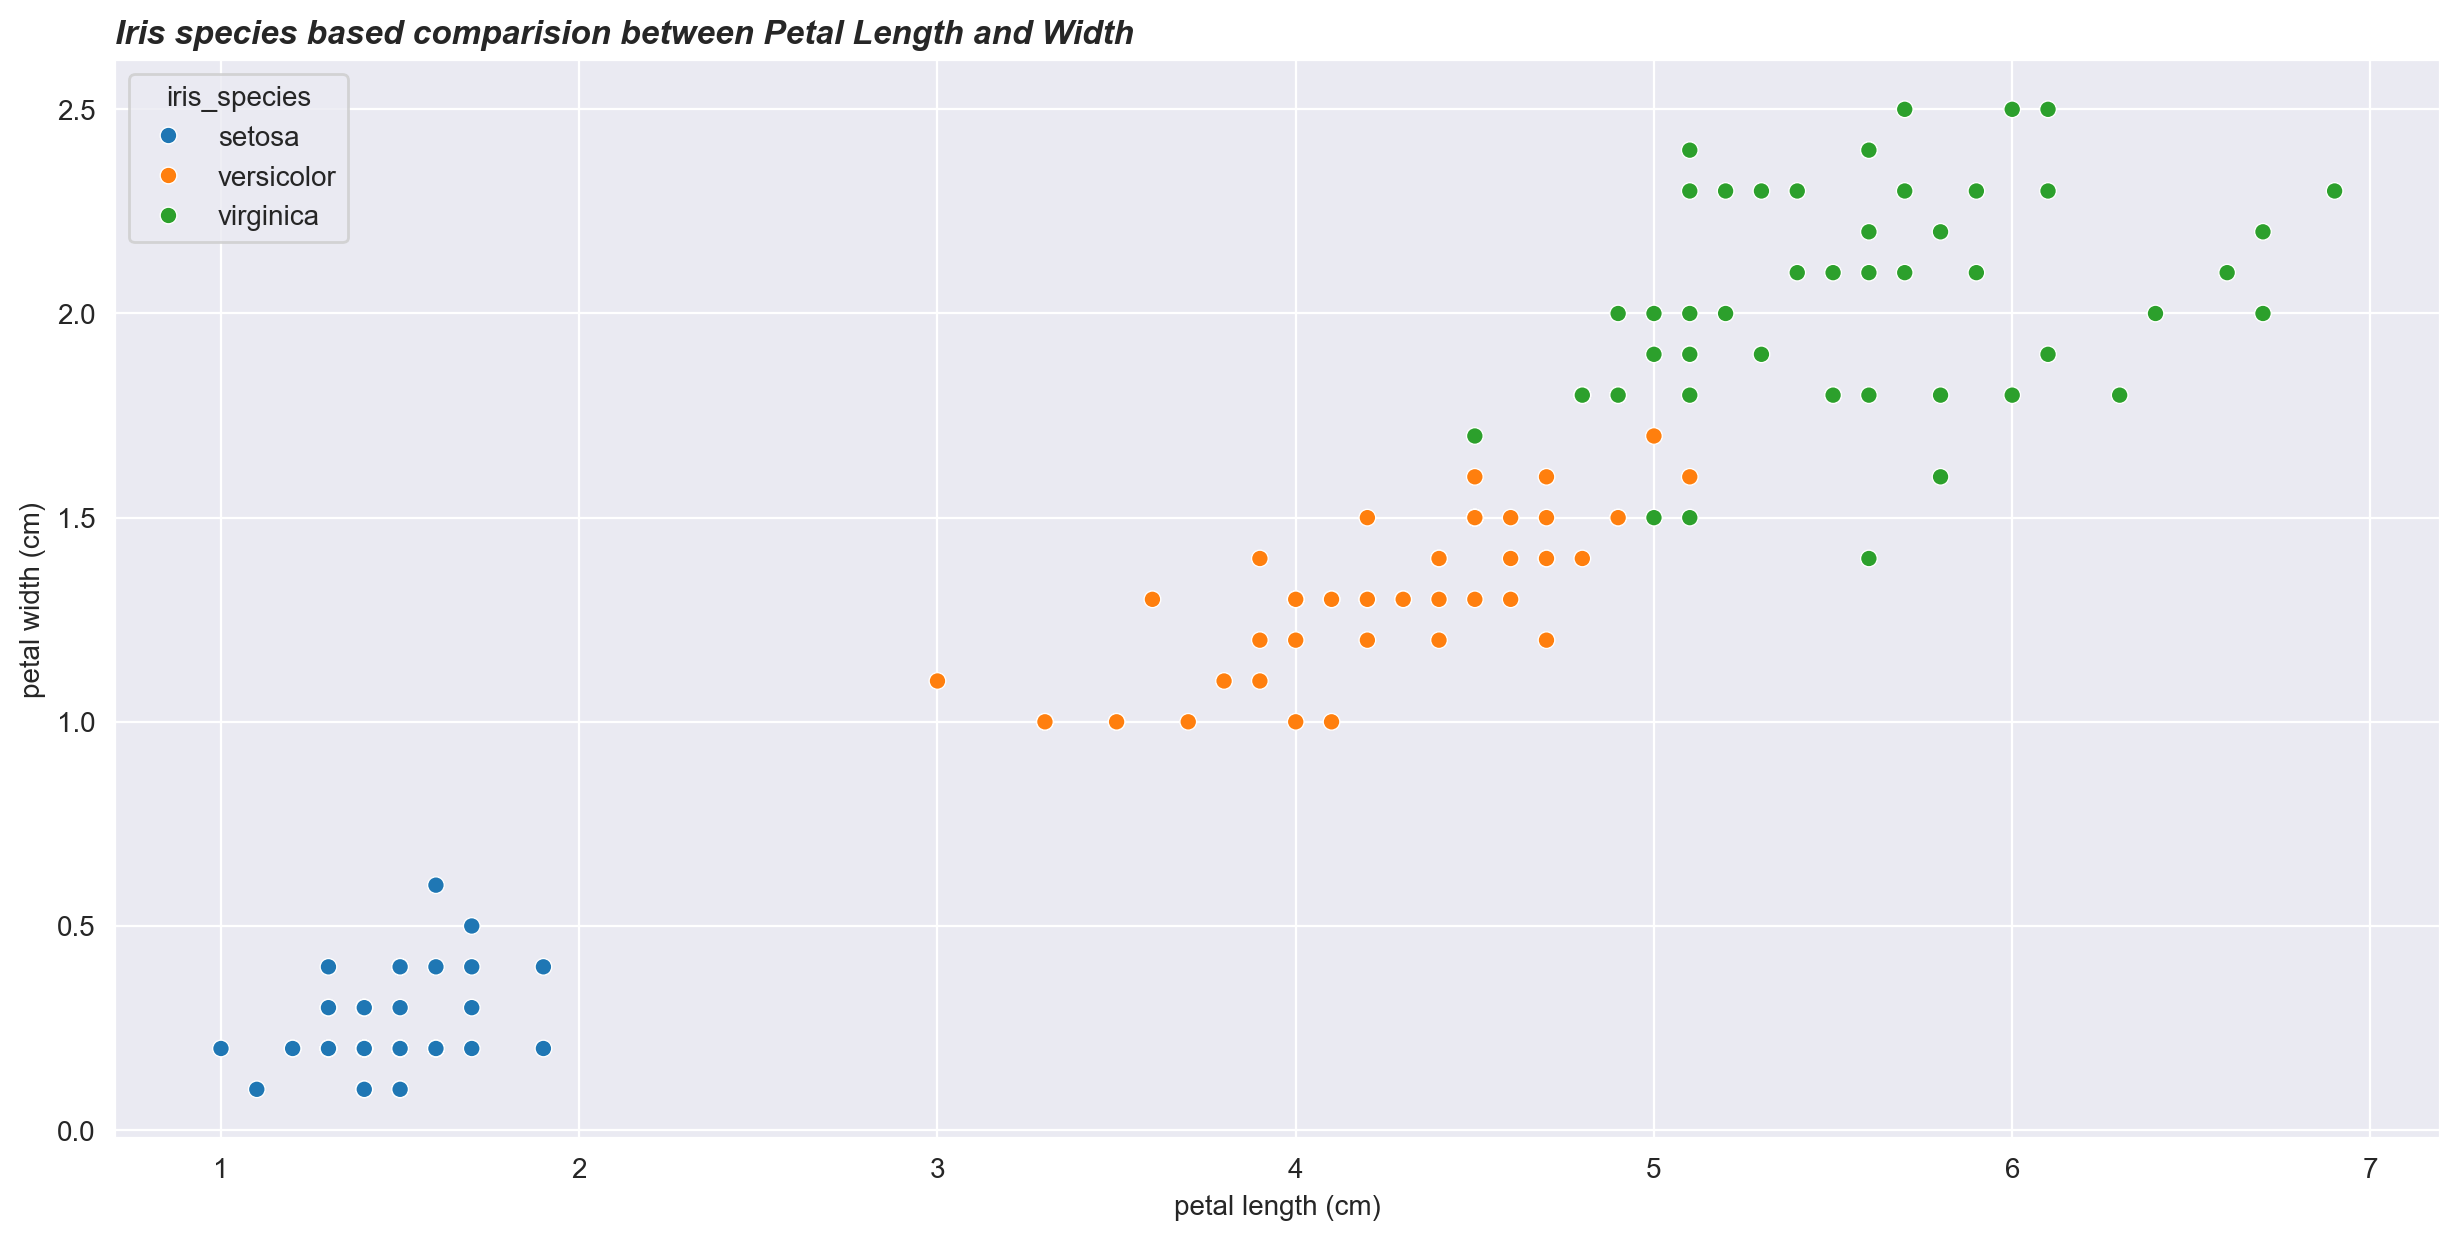

In [45]:
# Creating scatter plot for species between Sepal length and width
plt.figure(figsize=(15,7),dpi=200)
sns.set_style('darkgrid')
plt.title('Iris species based comparision between Petal Length and Width', 
          loc='left', weight = 'bold', style = 'italic')
sns.scatterplot(x = iris_df['petal length (cm)'], y = iris_df['petal width (cm)'], hue = iris_df['iris_species'])

As can be observed from the visual above:
1. Setosa species tend to have smaller overall petals.
2. Versicolor species doesn't vary alot in their petal width but have varying sizes.
3. Virginica species seems to have the largest overall petals of all the compared species.

From the observations above, we have confirmed and discovered some new trends in the features of Iris plants. For further having a "wider-picture" or a macro view of the data, we can use pair plots to check the relation betweeen all the features and to potentially discover some hidden trends.

#### Pair Plots:

Creating pair plots after scatter plots for our dataset analysis is a matter of broad-to-specific exploration. Each plot type has its own unique feature, and might help us discover some unforeseen trends. Additionally, this might help us in getting to some concrete conclusions for this analysis. 

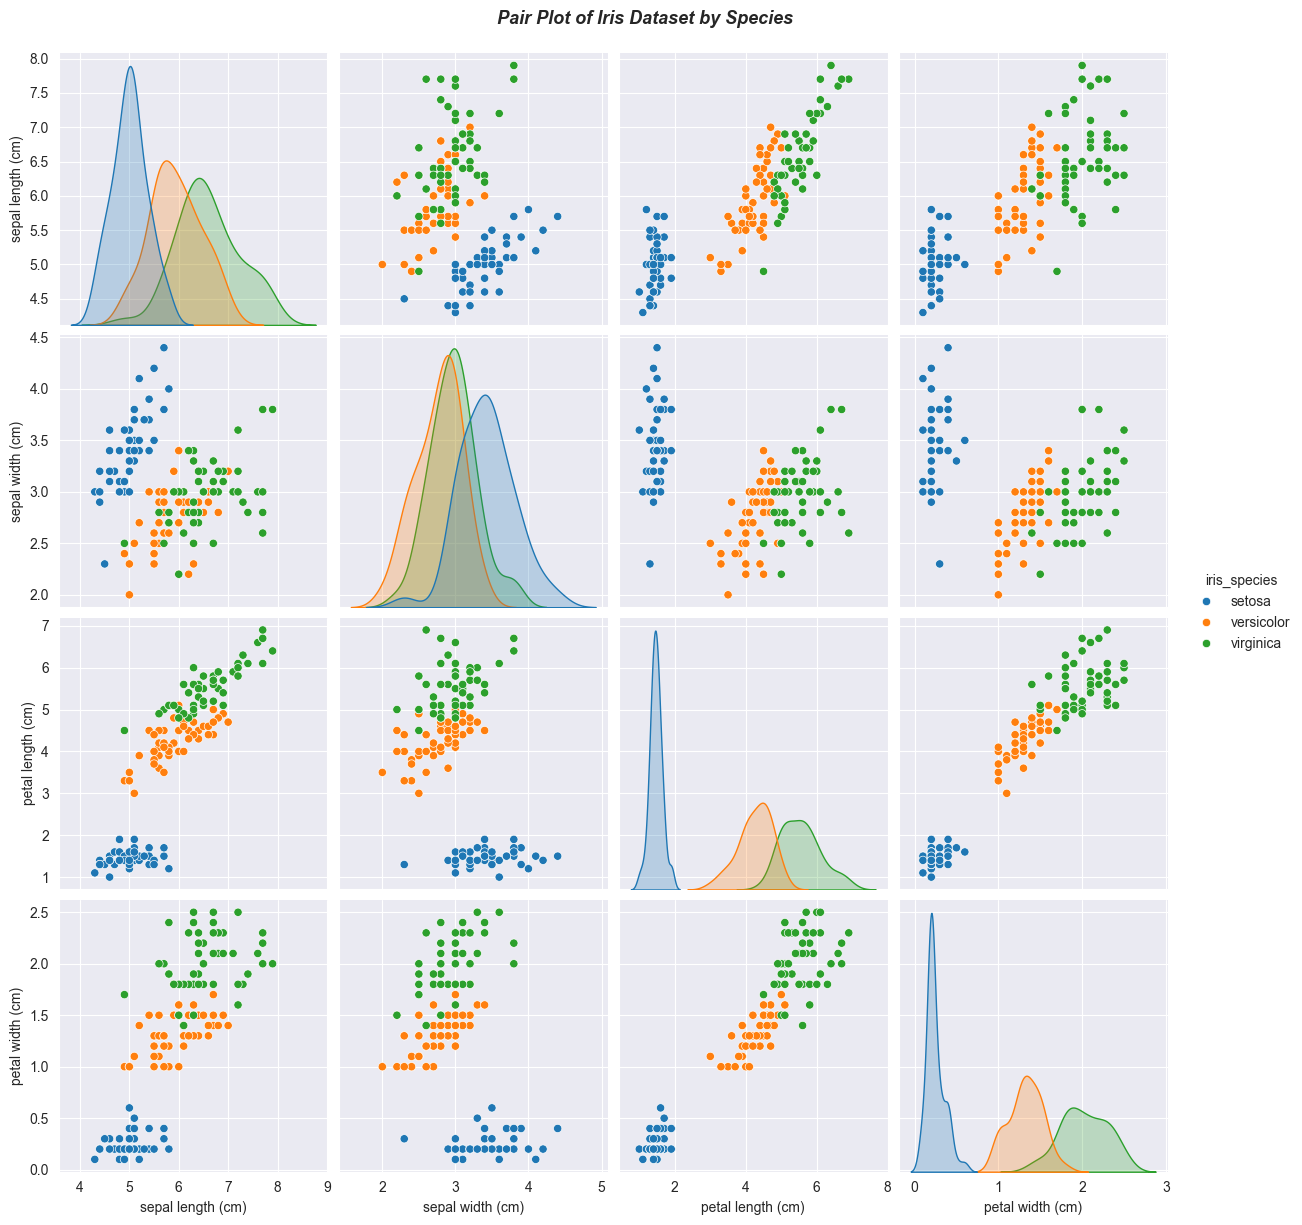

In [68]:
# Comparing all features by plotting the pair plot 
plt.close()
sns.set_style("darkgrid")
pairplot = sns.pairplot(iris_df, hue="iris_species", height=3, diag_kind="kde")
pairplot.figure.suptitle("Pair Plot of Iris Dataset by Species", 
                         y=1.02, fontsize=13, weight = 'bold', style = 'italic')
plt.show()

Observations from above leave us with the following conclusions:
1. Petal length and petal width are the best distinguishing features for the Iris species due to there being clear sepration in most of their values.
2. All the earlier mentioned observations from the scatter plots are true and present in this instance as well.

